In [199]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import *
from numpy import *
from matplotlib.font_manager import FontProperties
from matplotlib.lines import Line2D

def get_cmap(n, name='Paired'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)
#     return plt.get_cmap(name)
cmaps = get_cmap(12, 'Paired')

# plt.style.use('ggplot')
font = {'family' : 'Times New Roman',
        'size'   : 11}
plt.rc('lines', linewidth=2, markersize=1)
plt.rc('font', **font)
plt.rc('grid', c='0.8', ls='-', lw=0.5)
# plt.rc('axes', axisbelow=True)
plt.rcParams['axes.axisbelow'] = True
params = {'axes.grid': True, 'axes.labelsize': 11,'axes.titlesize': 11, 'font.size': 11, 'legend.fontsize': 11, 'xtick.labelsize': 11, 'ytick.labelsize': 11}

plt.rcParams.update(params)

%config InlineBackend.figure_format = 'svg'
%matplotlib inline


def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)
        


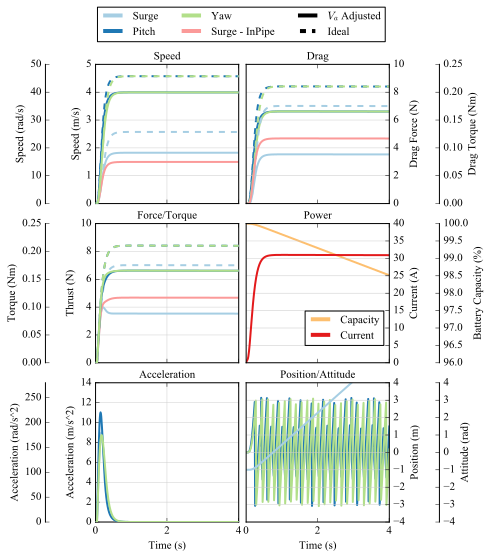

In [239]:
directions = ['Surge', 'Pitch', 'Yaw']
Speed_tags = ['v.x', 'v.p', 'v.yaw']
Cv_tags = ['d1', 'd5', 'd6']
Tau_tags = ['tau1', 'tau5', 'tau6']
JUsed = ['Real', 'Ideal']
acc_tags = ['vdot.x', 'vdot.p', 'vdot.yaw']
pos_tags = ['p.x', 'att.y', 'att.z']
Pitch = '20'
Diameter = '30'
# JUsed = 'Real' #Real or Ideal
fig_dynamics_response, axes = plt.subplots(3,2, figsize=(7,7), linewidth=1.5)

plt.setp(axes, xticks=arange(0,6,2))

# axes[0,1].yaxis.set_label_position("right")
# axes[1,1].yaxis.set_label_position("right")

ax00 = axes[0,0]
ax01 = axes[0,0].twinx()
ax10 = axes[0,1].twinx()
ax11 = axes[0,1]

ax20 = axes[1,0]
ax21 = axes[1,0].twinx()
ax30 = axes[1,1].twinx()
ax31 = axes[1,1]

ax40 = axes[2,0]
ax41 = axes[2,0].twinx()
ax50 = axes[2,1].twinx()
ax51 = axes[2,1]


# Axes 00
ax01.spines["left"].set_position(("axes", -0.35))
make_patch_spines_invisible(ax01)
ax01.spines["left"].set_visible(True)
ax01.yaxis.set_label_position('left')
ax01.yaxis.set_ticks_position('left')
ax00.set_ylim([0,5])
ax00.set_ylabel('Speed (m/s)')
ax01.set_ylabel('Speed (rad/s)')
ax00.tick_params(axis='x', labelbottom=False)
ax00.set_title('Speed')
ax00.grid(zorder=0)
ax01.grid(False)
# Axes 01
ax11.spines["right"].set_position(("axes", 1.35))
make_patch_spines_invisible(ax11)
ax11.spines["right"].set_visible(True)
ax11.yaxis.set_label_position('right')
ax11.yaxis.set_ticks_position('right')
ax10.set_ylim([0,10])
ax10.set_ylabel('Drag Force (N)')
ax11.set_ylabel('Drag Torque (Nm)')
ax11.tick_params(axis='x', labelbottom=False)
ax11.set_title('Drag')
ax10.grid(zorder=0)
ax11.grid(False)

# Axes 02
ax21.spines["left"].set_position(("axes", -0.35))
make_patch_spines_invisible(ax21)
ax21.spines["left"].set_visible(True)
ax21.yaxis.set_label_position('left')
ax21.yaxis.set_ticks_position('left')
ax20.set_ylim([0,10])
ax20.set_ylabel('Thrust (N)')
ax21.set_ylabel('Torque (Nm)')
ax20.tick_params(axis='x', labelbottom=False)
ax20.set_title('Force/Torque')
ax20.grid(zorder=0)
ax21.grid(False)

# Axes 03
ax31.spines["right"].set_position(("axes", 1.35))
make_patch_spines_invisible(ax31)
ax31.spines["right"].set_visible(True)
ax31.yaxis.set_label_position('right')
ax31.yaxis.set_ticks_position('right')
ax30.set_ylabel('Current (A)')
ax31.set_ylabel('Battery Capacity (%)')
ax31.tick_params(axis='x', labelbottom=False)
ax30.set_title('Power')
ax30.set_ylim([0,40])
ax31.set_ylim([96,100])
ax30.grid(zorder=0)
ax31.grid(False)

# Axes 04
ax41.spines["left"].set_position(("axes", -0.35))
make_patch_spines_invisible(ax41)
ax41.spines["left"].set_visible(True)
ax41.yaxis.set_label_position('left')
ax41.yaxis.set_ticks_position('left')
ax40.set_ylim([0,14])
ax41.set_ylim([0,280])
ax40.set_ylabel('Acceleration (m/s^2)')
ax41.set_ylabel('Acceleration (rad/s^2)')
ax40.set_xlabel('Time (s)')
ax40.set_title('Acceleration')
ax40.grid(zorder=0)
ax41.grid(False)

# Axes 05
ax51.spines["right"].set_position(("axes", 1.35))
make_patch_spines_invisible(ax51)
ax51.spines["right"].set_visible(True)
ax51.yaxis.set_label_position('right')
ax51.yaxis.set_ticks_position('right')
ax50.set_ylabel('Position (m)')
ax51.set_ylabel('Attitude (rad)')
ax51.set_xlabel('Time (s)')
ax50.set_title('Position/Attitude')
ax50.set_ylim([-4,4])
# ax51.set_ylim([96,100])
ax50.grid(zorder=0)
ax51.grid(False)


for idx, Dir in enumerate(directions):  
    
    data_ts_real = pd.read_pickle('Pickles/Dynamics_' + Diameter + 'D_' + Pitch + 'P_' + 'Real' + 'J_TimeSeries_' + Dir +'Only' )
    data_mv_real = pd.read_pickle('Pickles/Dynamics_' + Diameter + 'D_' + Pitch + 'P_' + 'Real' + 'J_Mv_' + Dir +'Only' )

    data_ts_ideal = pd.read_pickle('Pickles/Dynamics_' + Diameter + 'D_' + Pitch + 'P_' + 'Ideal' + 'J_TimeSeries_' + Dir +'Only' )
    data_mv_ideal = pd.read_pickle('Pickles/Dynamics_' + Diameter + 'D_' + Pitch + 'P_' + 'Ideal' + 'J_Mv_' + Dir +'Only' )

    ideal_ls = '--'
    if Dir == 'Surge':
        ax00.plot(data_ts_ideal.index/1000, data_ts_ideal[Speed_tags[idx]].values, ls=ideal_ls, c=cmaps(idx))
        ax10.plot(data_ts_ideal.index/1000, data_ts_ideal[Cv_tags[idx]].values, ls=ideal_ls,  c=cmaps(idx))
        ax20.plot(data_ts_ideal.index/1000, data_ts_ideal[Tau_tags[idx]].values, ls=ideal_ls,  c=cmaps(idx))
#         ax30.plot(data_ts_ideal.index/1000, data_ts_ideal['I_mA'].values/1000, ':',  c=cmaps(idx+4))
        
        ax00.plot(data_ts_real.index/1000, data_ts_real[Speed_tags[idx]], c=cmaps(idx))
        ax10.plot(data_ts_real.index/1000, data_ts_real[Cv_tags[idx]], c=cmaps(idx))
        ax20.plot(data_ts_real.index/1000, data_ts_real[Tau_tags[idx]], c=cmaps(idx))
        ax30.plot(data_ts_real.index/1000, data_ts_real['I_mA'].values/1000, c=cmaps(idx+5))
        ax31.plot(data_ts_real.index/1000, data_ts_real['mAh_remaining'].values,  c=cmaps(idx+6))
        ax40.plot(data_ts_real.index/1000, data_ts_real[acc_tags[idx]].values,  c=cmaps(idx))
        ax50.plot(data_ts_real.index/1000, data_ts_real[pos_tags[idx]].values,  c=cmaps(idx))



    else:        
        ax01.plot(data_ts_ideal.index/1000, data_ts_ideal[Speed_tags[idx]], ls=ideal_ls, c=cmaps(idx))
        ax11.plot(data_ts_ideal.index/1000, data_ts_ideal[Cv_tags[idx]], ls=ideal_ls, c=cmaps(idx))
        ax21.plot(data_ts_ideal.index/1000, data_ts_ideal[Tau_tags[idx]], ls=ideal_ls, c=cmaps(idx))
        
        ax01.plot(data_ts_real.index/1000, data_ts_real[Speed_tags[idx]], c=cmaps(idx))
        ax11.plot(data_ts_real.index/1000, data_ts_real[Cv_tags[idx]], c=cmaps(idx))
        ax21.plot(data_ts_real.index/1000, data_ts_real[Tau_tags[idx]], c=cmaps(idx))
        ax41.plot(data_ts_real.index/1000, data_ts_real[acc_tags[idx]].values,  c=cmaps(idx))
        ax51.plot(data_ts_real.index/1000, data_ts_real[pos_tags[idx]].values,  c=cmaps(idx))



# Add Inpipe Surge Lines
data_ts_real = pd.read_pickle('Pickles/Dynamics_' + Diameter + 'D_' + Pitch + 'P_' + 'InPipe' + 'J_TimeSeries_' + 'Surge' +'Only' )
ax00.plot(data_ts_real.index/1000, data_ts_real[Speed_tags[0]], c=cmaps(4))
ax10.plot(data_ts_real.index/1000, data_ts_real[Cv_tags[0]], c=cmaps(4))
ax20.plot(data_ts_real.index/1000, data_ts_real[Tau_tags[0]], c=cmaps(4))
# ax30.plot(data_ts_real.index/1000, data_ts_real['I_mA'].values/1000, label='Current', c=cmaps(4+4))


custom_lines = [Line2D([0], [0], color=cmaps(0), lw=4),
                Line2D([0], [0], color=cmaps(1), lw=4),
                Line2D([0], [0], color=cmaps(2), lw=4), 
                Line2D([0], [0], color=cmaps(4), lw=4), 
                Line2D([0], [0], color='k', lw=4), 
                Line2D([0], [0],ls=ideal_ls, color='k', lw=4)]

custom_lines2 = [Line2D([0], [0], color=cmaps(6), lw=4),
                Line2D([0], [0], color=cmaps(5), lw=4)]
ax30.legend(custom_lines2, ['Capacity', 'Current'], loc=4, bbox_to_anchor=(1,0.085) )

plt.tight_layout(pad=0.2, w_pad=0.2, h_pad=0.2)
ax00.legend(custom_lines, ['Surge', 'Pitch', 'Yaw', 'Surge - InPipe', '$V_a$ Adjusted', 'Ideal'], loc=2, ncol=3, bbox_to_anchor=(-0.025,1.45))


In [240]:
fig_dynamics_response.savefig('Dynamic_Simulation_Step_Response_Single_Dir_vsIdealJ.pdf', edgecolor='0.5', bbox_inches='tight')